In [1]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *

In [2]:
# 0:MNISTデータの読み込み==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

In [3]:
# 1:実験の設定==========
optimizers = {}
#optimizers['SGD'] = SGD()
#optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
optimizers['RMSprop'] = RMSprop()
optimizers['SDprop'] = SDprop()

In [4]:
networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []

In [5]:
# 2:訓練の開始==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))

===========iteration:0===========
AdaGrad:2.101684314111806
Adam:2.1769742078317504
RMSprop:2.2174748481951516
SDprop:2.0063685999928245
===========iteration:100===========
AdaGrad:0.11635664827133638
Adam:0.2695687778335058
RMSprop:0.08103361419227613
SDprop:0.08930155906242832
===========iteration:200===========
AdaGrad:0.10897464544302915
Adam:0.24588987778677796
RMSprop:0.08000748265018612
SDprop:0.07837083759553426
===========iteration:300===========
AdaGrad:0.18580850194745657
Adam:0.2692883954883808
RMSprop:0.13710383817758995
SDprop:0.1191591319161305
===========iteration:400===========
AdaGrad:0.03511983830956746
Adam:0.12333352711793963
RMSprop:0.02601558998978412
SDprop:0.017829738404531177
===========iteration:500===========
AdaGrad:0.03441992745259616
Adam:0.0335291441791833
RMSprop:0.01638389202367837
SDprop:0.03464489850731592
===========iteration:600===========
AdaGrad:0.11804938759553116
Adam:0.18485892089447648
RMSprop:0.051541623166242514
SDprop:0.055094356461464
===

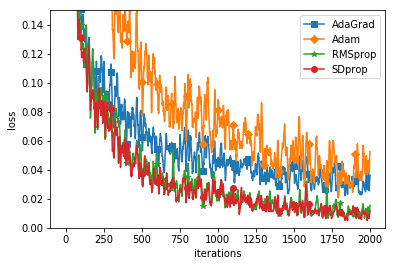

In [6]:
# 3.グラフの描画==========
#markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D", "RMSprop": "*"}
#markers = {"Momentum": "x", "AdaGrad": "s", "Adam": "D", "RMSprop": "*", "SDprop": "o" }
markers = {"AdaGrad": "s", "Adam": "D", "RMSprop": "*", "SDprop": "o" }
#markers = {"Adam": "D", "RMSprop": "*", "SDprop": "o" }

x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 0.15)
plt.legend()
plt.show()